# Analysis of Sentiment of News Org 
Analysis of sentiment about five major news organization was executed running VADER analyzer.polarity_scores  over 500 tweets obtained by the API  api.user_timeline. Each run returned for each tweet: id, creation date, text, user name, scores obtained as positive, negative, neutral and compound statuses. Then a DataFrame was created with these results and sorted by timestamp. A symbolic color was assigned to each News Organization consulted: BBC – lightskyblue, CNN – red, Fox – blue, CBS – green, NY Times – yellow.

<b>Trend 1</b>

CBS got the most positive tweets sent by the users of this news org media. The second place is hold by Fox and BBC.

<b>Trend 2</b>

NY Times received the most negative tweets sent by the users of this news org media.

<b>Trend 3</b>

CNN received most of the neutral tweets sent by the users of this news org media. 


In [17]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
#import requests as req
import matplotlib.pyplot as plt
#import apikeys
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = 'Jvuhm7jKRfqi8wllp5JzSRYMQ'
consumer_secret = 'b4Kezc5fRdBcdfpiklEmQPx8u8wcdAj8GO2jSG8r8JFXfKwkmk'
access_token = '932804293903638528-PnC6wzw71CMcaQGfLnQLKwUSEaTlmKv'
access_token_secret = 'tYd4QeatpbfkJw9PlyQM0VKhwSP3eow7EUE1gQinquyV3'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target User Account
target_media = ('@nytimes','@bbc','@cnn','@CBS','@Fox')

# Variables for holding sentiments
reference_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
text_list = []
date_list = []
account_list = []
userscreen_list = []

for news_org in target_media:
    # Loop through 5 pages of tweets (total 100 tweets)
    counter = 0
    for page in range(5):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(news_org, page=page)
        
        # Loop through all tweets
        for tweet in public_tweets:
            text = tweet['text']
            date_tweet = tweet['created_at']
            source_account = tweet['id_str']
            user_scr_name = tweet['user']['screen_name']
            # print(text)
            # Run Vader Analysis on each tweet
            scores = analyzer.polarity_scores(text)
            compound = scores['compound']
            pos = scores['pos']
            neu = scores['neu']
            neg = scores['neg']
            #print(tweet)
            # Add each value to the appropriate list
            text_list.append(text)
            date_list.append(date_tweet)
            account_list.append(source_account)
            userscreen_list.append(user_scr_name)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            reference_list.append(counter)
            counter = counter + 1
            
## Create a Dataframe including: tweet's source acount, 
## its text, its date, and its compound, positive, neutral, and negative sentiment scores.
sentiment_df = pd.DataFrame()
sentiment_df['Tweet Account'] = account_list
sentiment_df['Text'] = text_list
sentiment_df['Timestamp'] = date_list
sentiment_df['News Org'] = userscreen_list
sentiment_df['Compound'] = compound_list
sentiment_df['Positive'] = positive_list
sentiment_df['Negative'] = negative_list
sentiment_df['Neutral'] = neutral_list
sentiment_df['Ref_Number'] = reference_list
#sentiment_df.count()


In [18]:
## Sort each tweet value by its relative timestamp
sentiment_df['Timestamp'] = pd.to_datetime(sentiment_df.Timestamp)
sentiment_df.sort_values(by='Timestamp')

,Tweet Account,Text,Timestamp,News Org,Compound,Positive,Negative,Neutral,Ref_Number
399,936067255552557057,"Get on your feet, and prepare to dance. #Bruno...",2017-11-30 02:59:59,CBS,0.0000,0.000,0.000,1.000,99
398,936067903555739648,RT @asbstar30: BRUNO #BrunoMars,2017-11-30 03:02:34,CBS,0.0000,0.000,0.000,1.000,98
397,936068077464166402,RT @Queentassia14: Bruno Mars Live at the Apol...,2017-11-30 03:03:15,CBS,0.7067,0.246,0.000,0.754,97
396,936068930250014722,RT @BrunoMars: POP POP!!💥💥 everyone tweet #Bru...,2017-11-30 03:06:38,CBS,0.0000,0.000,0.000,1.000,96
395,936069102904401920,RT if you’re ready to party with #BrunoMars!! ...,2017-11-30 03:07:20,CBS,0.6988,0.452,0.000,0.548,95
394,936069749552713729,RT @Tiffany48184: Now that's how you open up a...,2017-11-30 03:09:54,CBS,0.0000,0.000,0.000,1.000,94
393,936070158073729025,RT @MargoSlade: Best way to relax after a hard...,2017-11-30 03:11:31,CBS,0.8979,0.394,0.049,0.557,93
392,936073057839431680,When #BrunoMars tells you to pick up the phone...,2017-11-30 03:23:03,CBS,0.0000,0.000,0.000,1.000,92
391,936075699307257856,We’re only halfway into the show. Get ready fo...,2017-11-30 03:33:32,CBS,0.7232,0.302,0.000,0.698,91
390,936076119538728960,RT @RDMichelleLNK: Loving a dose of #BrunoMars...,2017-11-30 03:35:13,CBS,0.8513,0.542,0.000,0.458,90


In [19]:
sentiment_df['News_Org_Color'] = ''
for index, row in sentiment_df.iterrows():
    if row['News Org'] == 'CBS':
        sentiment_df.set_value(index,'News_Org_Color','g')
    elif row['News Org'] == 'fox':
        sentiment_df.set_value(index,'News_Org_Color','b')
    elif row['News Org'] == 'CNN':
        sentiment_df.set_value(index,'News_Org_Color','r')
    elif row['News Org'] == 'nytimes':
        sentiment_df.set_value(index,'News_Org_Color','y')
    elif row['News Org'] == 'BBC':
        sentiment_df.set_value(index,'News_Org_Color','w')
sentiment_df.head()

,Tweet Account,Text,Timestamp,News Org,Compound,Positive,Negative,Neutral,Ref_Number,News_Org_Color
0,940066876305981440,RT @nytimesworld: Protests in Lebanon near U.S...,2017-12-11 03:53:03,nytimes,-0.2263,0.000,0.128,0.872,0,y
1,940063377543409666,Horror films dominated the cultural conversati...,2017-12-11 03:39:09,nytimes,0.1280,0.162,0.143,0.695,1,y
2,940059834245775360,RT @nytimesworld: London's Heathrow Airport wa...,2017-12-11 03:25:04,nytimes,0.0000,0.000,0.000,1.000,2,y
3,940056907846377473,17 ways to celebrate the season in New York Ci...,2017-12-11 03:13:26,nytimes,0.6467,0.184,0.000,0.816,3,y
4,940052731825229825,9 ways to work better in 2018 https://t.co/LMK...,2017-12-11 02:56:51,nytimes,0.4404,0.326,0.000,0.674,4,y


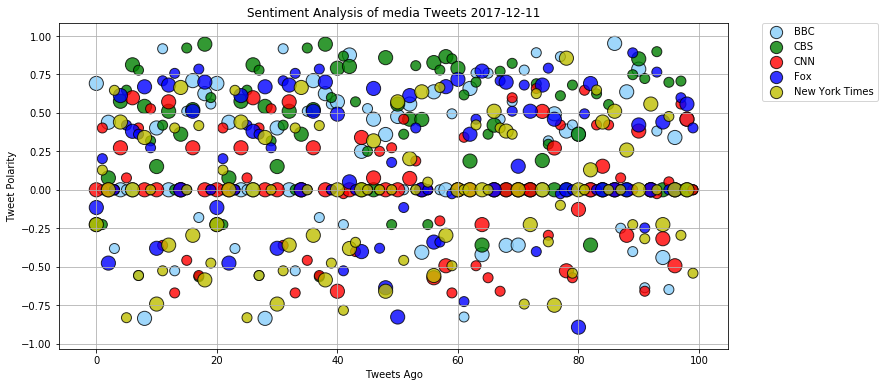

In [24]:
#fig, ax = plt.subplots(facecolor='white')
max_timestamp = sentiment_df['Timestamp'].max()
max_timestamp = str(max_timestamp)
max_timestamp = max_timestamp[0:10]
#print(max_timestamp)
#
plt.figure(figsize=(12, 6))
plt.scatter(sentiment_df['Ref_Number'][sentiment_df['News_Org_Color'] == 'w'],
            sentiment_df['Compound'][sentiment_df['News_Org_Color'] == 'w'], c = 'lightskyblue', 
            marker='o', edgecolors='black', sizes=(200,100), linewidths=1, alpha=0.8, label='BBC')
plt.scatter(sentiment_df['Ref_Number'][sentiment_df['News_Org_Color'] == 'g'],
            sentiment_df['Compound'][sentiment_df['News_Org_Color'] == 'g'], c = 'g', 
            marker='o', edgecolors='black', sizes=(200,100), linewidths=1, alpha=0.8, label='CBS')
plt.scatter(sentiment_df['Ref_Number'][sentiment_df['News_Org_Color'] == 'r'],
            sentiment_df['Compound'][sentiment_df['News_Org_Color'] == 'r'], c = 'r', 
            marker='o', edgecolors='black', sizes=(200,100), linewidths=1, alpha=0.8, label='CNN')
plt.scatter(sentiment_df['Ref_Number'][sentiment_df['News_Org_Color'] == 'b'],
            sentiment_df['Compound'][sentiment_df['News_Org_Color'] == 'b'], c = 'b', 
            marker='o', edgecolors='black', sizes=(200,100), linewidths=1, alpha=0.8, label='Fox')
plt.scatter(sentiment_df['Ref_Number'][sentiment_df['News_Org_Color'] == 'y'],
            sentiment_df['Compound'][sentiment_df['News_Org_Color'] == 'y'], c = 'y', 
            marker='o', edgecolors='black', sizes=(200,100), linewidths=1, alpha=0.8, label='New York Times')
plt.title("Sentiment Analysis of media Tweets " + max_timestamp)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.savefig("Media_Sentiment_bubles.png")
plt.show()

In [21]:
#Aggregate by Average over the Compound values for each news organization
News_Org_list = ["BBC","CBS","CNN","fox","nytimes"]
News_Org_Avg = []
for org in News_Org_list:
    compound_avg = sentiment_df.loc[sentiment_df['News Org'] == org]['Compound'].mean()
    News_Org_Avg.append(round(compound_avg,2))
    
News_Org_Colors = ['lightskyblue','g','r','b','y']
print('News Org: ' , News_Org_list)
print('News Org Avg: ', News_Org_Avg)
print('News Org Colors: ', News_Org_Colors)

News Org:  ['BBC', 'CBS', 'CNN', 'fox', 'nytimes']
News Org Avg:  [0.16, 0.37, 0.01, 0.22, -0.02]
News Org Colors:  ['lightskyblue', 'g', 'r', 'b', 'y']


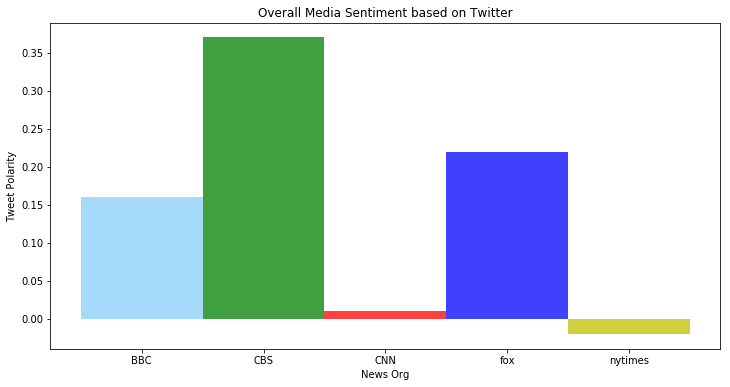

In [25]:
plt.figure(figsize=(12, 6))
x_values = np.arange(len(News_Org_list))
w = 1.0
plt.xticks(x_values, News_Org_list)
plt.title("Overall Media Sentiment based on Twitter")
plt.xlabel("News Org")
plt.ylabel("Tweet Polarity")
plt.bar(x_values, News_Org_Avg, color=News_Org_Colors, width=w, alpha=0.75)
plt.savefig("Media_Sentiment_bars.png")
plt.show()

In [23]:
sentiment_df.to_csv('News_Org_Sentiment_Analysis.csv', sep=',', index=False, encoding='utf-8')